# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [ ]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np



## Get the list of stocks in the S&P 500

In [ ]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [ ]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [ ]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [ ]:
# CODE HERE
# Use as many coding cells as you need
# Selección de tickers para pruebas (puedes usar todos si tu compu lo soporta)
subset_tickers = ticker_list[:50]

df_tickers_data = yf.download(ticker_list, start=start_date, end=end_date, group_by='ticker', auto_adjust=False, progress=True)


# Load closing prices
# Make sure you end this coding section by displaying your results: display(df_close)
df_close = yf.download(subset_tickers, start=start_date, end=end_date)['Close']
df_close = df_close.dropna(axis=1, how='all')
display(df_close)

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')
/tmp/ipython-input-72-176276998.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_close = yf.download(subset_tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  50 of 50 completed


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,ARE,ATO,AWK,AXP,GOOG,GOOGL,LNT,MMM,MO,T
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376282,168.283661,154.714767,156.160004,103.735443,91.096085,293.442139,469.390015,189.859955,55.668903,...,109.147240,115.099678,121.554024,228.295090,164.591660,162.883133,48.697845,95.778595,39.832222,15.922409
2024-05-02,136.217361,171.991272,153.844193,158.330002,103.374344,90.497009,295.092743,476.570007,192.405914,56.603561,...,110.436920,115.477974,122.360359,229.320877,167.464569,165.626678,49.171677,94.192657,39.977661,15.828302
2024-05-03,138.129074,182.279175,156.695099,159.710007,103.354820,89.774330,298.403900,486.179993,195.480652,56.431885,...,112.623802,115.739876,125.080551,227.614517,167.991455,166.242981,49.171677,94.523468,39.623154,15.856535
2024-05-06,139.278091,180.619171,155.681030,162.000000,103.101074,92.370285,300.712860,493.589996,199.093933,57.404686,...,112.025688,115.865974,126.537796,231.125839,168.826477,167.097870,48.833225,93.978600,39.532257,15.988280
2024-05-07,139.931824,181.305038,155.508835,159.809998,103.618332,93.387741,305.232483,492.269989,199.338730,58.739899,...,111.876152,116.729279,128.063065,231.451340,171.957855,170.229065,49.442432,92.956993,39.859489,16.072977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,106.795090,208.097107,178.825470,121.709999,128.801849,92.099998,291.410004,360.910004,194.345154,48.284031,...,75.870018,158.786774,145.167801,266.646790,161.276154,159.087402,60.825306,138.203125,57.708759,27.257639
2025-04-25,106.056648,209.005920,184.466751,122.510002,128.274216,90.680000,293.390015,367.720001,193.708054,47.759418,...,74.514839,157.265244,143.110168,264.143097,163.653290,161.764175,60.240162,136.650742,57.266430,26.544762
2025-04-28,106.645409,209.864792,190.692963,123.300003,128.951172,91.190002,293.250000,368.619995,192.841995,47.561451,...,75.595055,157.851974,143.408371,264.282776,162.225006,160.415802,60.398842,137.257751,57.197624,26.990311


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [ ]:
# CODE HERE
# Use as many coding cells as you need
df_ma50 = df_close.rolling(window=50).mean()
df_ma200 = df_close.rolling(window=200).mean()

# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)
display(df_ma50)
display(df_ma200)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,ARE,ATO,AWK,AXP,GOOG,GOOGL,LNT,MMM,MO,T
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,118.589774,219.229514,194.882049,128.497001,129.695851,91.7206,322.755805,401.392800,204.386194,46.354729,...,89.318570,150.042745,140.074006,270.857654,166.393732,164.355542,61.903755,143.654412,55.346535,26.393464
2025-04-25,117.960953,218.678437,194.779480,128.136801,129.675177,91.7690,320.885378,399.492000,204.194042,46.424616,...,88.964358,150.294294,140.450743,270.048174,165.966866,163.927285,61.905937,143.439081,55.461809,26.427452
2025-04-28,117.376369,218.051459,194.792595,127.782001,129.642278,91.7896,318.998219,397.680000,203.901113,46.480952,...,88.620321,150.525148,140.796664,269.219615,165.462548,163.421579,61.901969,143.238862,55.570301,26.465059


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,ARE,ATO,AWK,AXP,GOOG,GOOGL,LNT,MMM,MO,T
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,133.080366,227.101212,183.261853,130.701575,116.973859,96.197872,340.475851,478.509449,214.892000,52.358255,...,101.930576,138.679998,135.404767,273.740993,173.555180,171.899743,58.719725,132.609984,50.799247,22.248537
2025-04-25,132.988337,227.008164,183.380334,130.551875,117.119244,96.185332,340.478539,477.517949,214.720084,52.293548,...,101.754794,138.905733,135.481740,273.885721,173.425796,171.768219,58.771103,132.804895,50.868683,22.292803
2025-04-28,132.891064,226.898010,183.529515,130.409175,117.261134,96.177719,340.493397,476.538299,214.512771,52.222563,...,101.580160,139.123461,135.552828,274.025310,173.278224,171.619006,58.821678,132.993143,50.936706,22.338255


### Detecting Golden and Death Crosses in the last 14 days

In [ ]:
# CODE HERE
# Use as many coding cells as you need
def detect_crosses(ma50, ma200):
    crosses = pd.DataFrame(index=ma50.index)
    for col in ma50.columns:
        # Golden Cross = 50 cruza de abajo hacia arriba a 200
        condition = (ma50[col] > ma200[col]) & (ma50[col].shift(1) < ma200[col].shift(1))
        crosses[col] = condition
    return crosses

# Detectar cruces en los últimos 14 días
golden_cross = detect_crosses(df_ma50, df_ma200).iloc[-14:]
death_cross = detect_crosses(df_ma200, df_ma50).iloc[-14:]

# Extraer nombres de tickers
golden_cross_stocks = golden_cross.any()[golden_cross.any()].index.tolist()
death_cross_stocks = death_cross.any()[death_cross.any()].index.tolist()

print("Golden Crosses:", golden_cross_stocks)
print("Death Crosses:", death_cross_stocks)
# define a function that detects golden and death crosses in the last 14 days for all stocks

Golden Crosses: ['AMT']
Death Crosses: ['ACN', 'ADSK', 'AME', 'AMP', 'AMZN', 'APD', 'APO', 'AXP']


In [ ]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)
display(golden_cross_stocks)

['AMT']

In [ ]:
# use the display function to show as many intermediary results
# for example display(df_death_cross_14d)
display(death_cross_stocks)

['ACN', 'ADSK', 'AME', 'AMP', 'AMZN', 'APD', 'APO', 'AXP']

#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

In [ ]:
sorted_golden = sorted(golden_cross_stocks)
print("Top empresas con Golden Cross:", sorted_golden[:10])

Top empresas con Golden Cross: ['AMT']


#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days:

In [ ]:
sorted_death = sorted(death_cross_stocks)
print("Top empresas con Death Cross:", sorted_death[:10])

Top empresas con Death Cross: ['ACN', 'ADSK', 'AME', 'AMP', 'AMZN', 'APD', 'APO', 'AXP']


### Visualization of the results
(in alphabetical order)

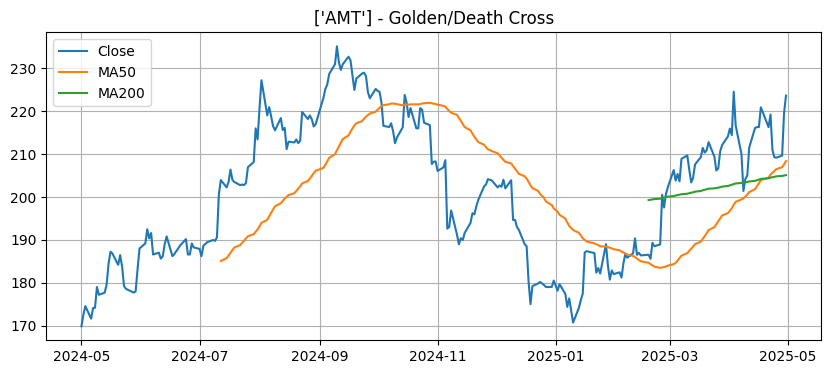

In [ ]:
import matplotlib.pyplot as plt

def plot_stock_with_crosses(ticker):
    plt.figure(figsize=(10, 4))
    plt.plot(df_close[ticker], label='Close')
    plt.plot(df_ma50[ticker], label='MA50')
    plt.plot(df_ma200[ticker], label='MA200')
    plt.title(f"{ticker} - Golden/Death Cross")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_stock_with_crosses(sorted_golden[:10])

#### Compute the volatility of every stock and print it in the title of each plot

In [ ]:
# CODE HERE
# Use as many coding cells as you need
# Compute the volatility of every stock in the S&P 500

daily_returns = df_close.pct_change()
daily_volatility = daily_returns.std()
trading_days_per_year = 252
sqrt_trading_days = trading_days_per_year ** 0.5

annualized_volatility = daily_volatility * sqrt_trading_days

# Print the first few values of annualized volatility
print(annualized_volatility.head())

Ticker
A       0.295188
AAPL    0.326746
ABBV    0.270621
ABNB    0.413837
ABT     0.206291
dtype: float64


#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

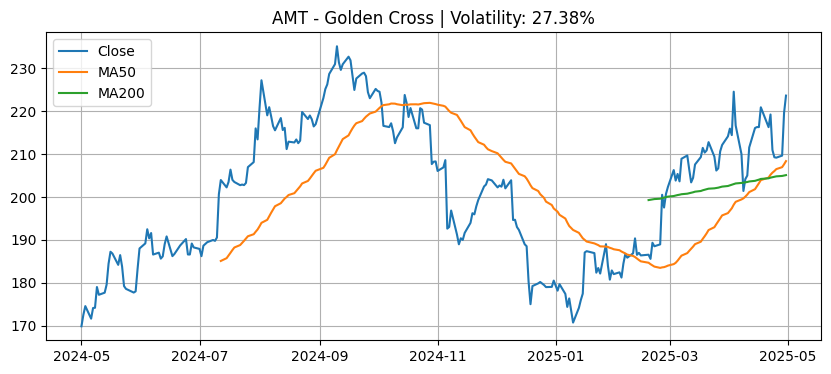

In [ ]:
# CODE HERE
# Visualize the results here
for ticker in sorted_golden[:10]:
    plt.figure(figsize=(10, 4))
    plt.plot(df_close[ticker], label='Close')
    plt.plot(df_ma50[ticker], label='MA50')
    plt.plot(df_ma200[ticker], label='MA200')
    vol = annualized_volatility[ticker]
    plt.title(f"{ticker} - Golden Cross | Volatility: {vol:.2%}")
    plt.legend()
    plt.grid(True)
    plt.show()

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

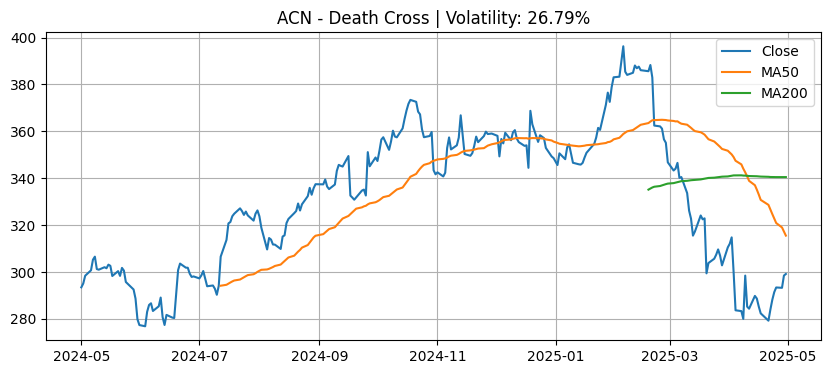

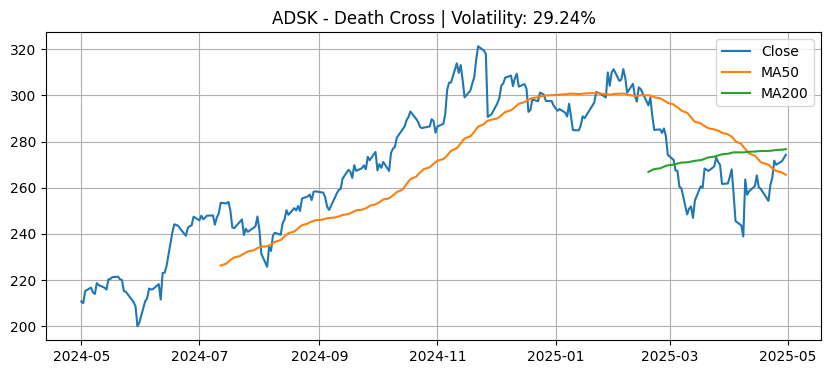

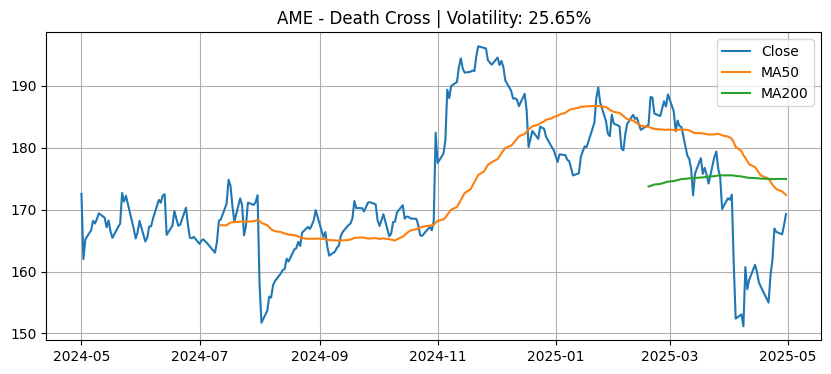

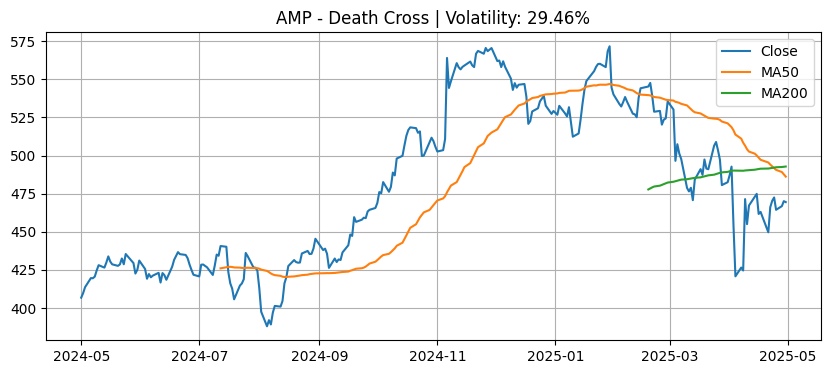

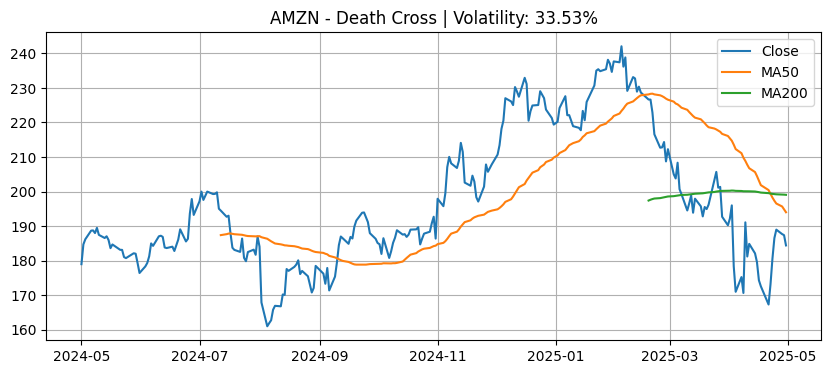

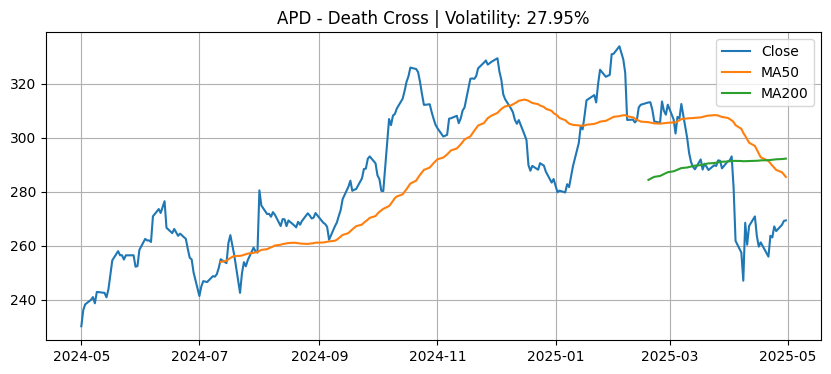

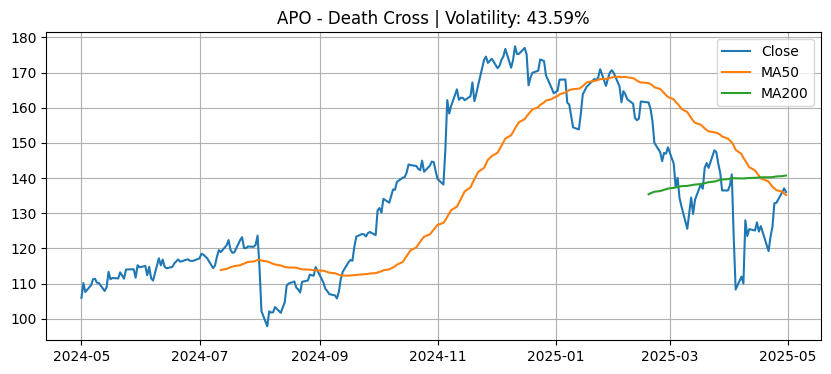

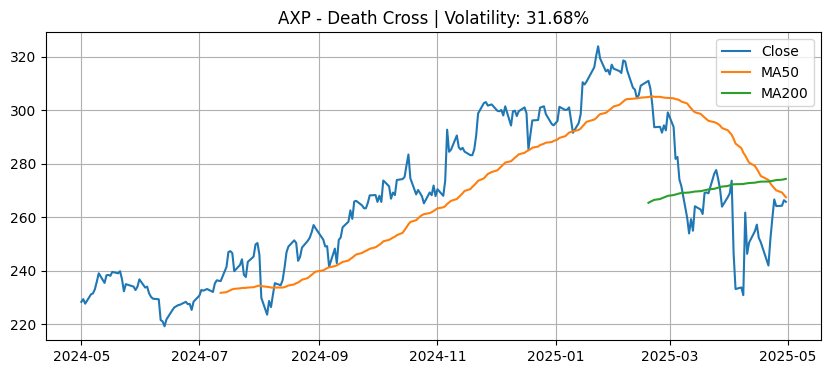

In [ ]:
# CODE HERE
# Visualize the results here
for ticker in sorted_death[:10]:
    plt.figure(figsize=(10, 4))
    plt.plot(df_close[ticker], label='Close')
    plt.plot(df_ma50[ticker], label='MA50')
    plt.plot(df_ma200[ticker], label='MA200')
    vol = annualized_volatility[ticker]
    plt.title(f"{ticker} - Death Cross | Volatility: {vol:.2%}")
    plt.legend()
    plt.grid(True)
    plt.show()

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

A Golden Cross is a bullish signal in technical analysis. It occurs when a stock's short-term moving average (commonly the 50-day MA) crosses above its long-term moving average (usually the 200-day MA).

This crossover suggests that recent momentum is stronger than the long-term trend, which can indicate the start of a sustained upward move. Many traders interpret it as a good time to enter a long position or add to their investment.


#### What is a Death Cross and how might market participants react to it?

The Death Cross is essentially the opposite. It happens when the 50-day moving average crosses below the 200-day average. This pattern often signals that a stock may be entering a downtrend.

Market participants might react by selling, reducing their exposure, or avoiding new positions in that stock, especially if other technical or fundamental indicators also point to weakness.


#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

Moving averages help smooth out the daily noise in price data and highlight the underlying trend.

* The 50-day MA gives insight into the short-to-mid-term momentum.

* The 200-day MA reflects the long-term price behavior.
By comparing both, we can get a sense of whether sentiment is shifting. If the short-term average crosses the long-term, that’s often interpreted as a significant change in momentum.


#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

Checking for crosses in the last 14 days allows us to focus on recent signals that could be relevant for immediate trading decisions.

However, this time frame is relatively short. It’s good for spotting new opportunities, but it can also lead to false signals, especially in volatile markets. A longer analysis window might be more conservative but could delay entry into a good opportunity.


#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

Volatility tells us how much a stock’s price moves over time. A Golden or Death Cross in a highly volatile stock might be less reliable because the price is constantly fluctuating.

If the volatility is low, a crossover may indicate a more stable and meaningful trend. So, combining volatility with crossovers helps us decide whether the signal is strong enough to act on.

### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

To evaluate this, we’d use a method called backtesting. This means we simulate how a trade would perform if we had followed the signal in the past.
For example:

* Buy the stock when the Golden Cross occurs.

* Sell it either after a certain number of days (e.g., 30 or 60) or when a Death Cross appears.We’d then compare the returns from these trades with the performance of the overall market or a passive strategy like holding the S&P 500. This helps determine whether the Golden Cross truly provides an edge.

#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

This is a common pitfall. Technical indicators only look at price history, not what the company is actually doing.

A Golden Cross might occur during a temporary price surge caused by hype, but the company could still have poor earnings, rising debt, or legal issues.

You might end up buying a technically strong stock that is fundamentally weak.
For a complete picture, it’s important to combine technical analysis with fundamental analysis.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

There are several ways to improve the strategy:

* Add filters like trading volume. A crossover with high volume is usually more meaningful.
* Combine with other indicators such as RSI, MACD, or Bollinger Bands to confirm the trend.
* Wait for confirmation days after the crossover (e.g., 2–3 days where the price stays above the 200-day MA).
* Avoid acting on signals in highly volatile environments, unless supported by news or sentiment.

### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

Absolutely. News sentiment adds valuable context.

A Golden Cross paired with positive sentiment (such as good earnings or favorable news) is more likely to reflect a real upward trend.

A Death Cross followed by negative sentiment (like layoffs or legal troubles) reinforces the bearish outlook.

On the other hand, if sentiment is neutral or opposite to the signal, it’s a red flag and suggests caution.

### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

It’s a good starting point, but not enough by itself.
It works best as part of a larger trading or investing framework, including:

* Fundamental research,

* Risk management (e.g., stop-loss, position sizing),

* Market and sector analysis. Used alone, the strategy might expose traders to false positives or miss bigger-picture trends.

#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

Not necessarily.

In our analysis, we computed the volatility of each stock and included it in the title of every price plot, especially focusing on the behavior following a Golden Cross — a technical pattern where the 50-day moving average crosses above the 200-day moving average, often interpreted as a bullish signal.

However, when we examined the actual stock performance after these Golden Cross events, the results were mixed.

What we observed in some cases, the stock price did continue to rise after the Golden Cross, supporting the traditional belief that it signals upward momentum.

But in many other cases, the price either remained flat or even declined shortly afterward, despite the crossover.

This inconsistency was especially noticeable when we looked at volatility:

* Stocks with high volatility showed more erratic behavior post-Golden Cross, making the signal less reliable.

* On the other hand, lower-volatility stocks tended to show more stable trends, but still didn’t always move upward.

Golden Crosses do not consistently predict upward movement on their own. While they can indicate a shift in momentum, our data shows that:

* Market context, sector trends, and individual stock characteristics (like volatility) all play a significant role in what happens next.

* Relying only on the Golden Cross as a buy signal could be misleading, especially for more volatile stocks.

To improve predictions, it would be better to combine the Golden Cross with other indicators (e.g., volume, RSI, or macro news) and consider recent volatility patterns to assess the strength of the trend.


#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

* Golden and Death Crosses are useful signals for identifying potential trend shifts, especially when supported by other data.

* Including volatility measurements gives important context, helping to filter out signals that may come from noisy markets.

Caveats in 2 or 3 bullet points:

* These signals are not predictive on their own they lag behind price and are prone to false positives.

* Ignoring fundamentals or broader market conditions can lead to poor trading decisions.

* The analysis is sensitive to the chosen time window (e.g., 14 days), which can limit its predictive power.